# Loading The Data 

In [1]:
import pandas as pd
import pandas as pd
from data_cleaning_utils import handle_missing_values
from db_utils import NullPercentageCalculator, DataFrameTransform

loans_df = pd.read_csv("loan_payments_data.csv") 
loans_df.head(20)

             id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848         8000         8000.0             8000.0   
1      38656203   41440010        13200        13200.0            13200.0   
2      38656154   41439961        16000        16000.0            16000.0   
3      38656128   41439934        15000        15000.0            15000.0   
4      38656121   41439927        15000        15000.0            15000.0   
...         ...        ...          ...            ...                ...   
54226     76597      76583         5000         5000.0             1775.0   
54227    142608      74724         5000         5000.0             2350.0   
54228    117045      70978         3500         3500.0             2225.0   
54229     88854      70699         5000         5000.0              225.0   
54230     72323      70694         5000         5000.0              350.0   

            term  int_rate  instalment grade sub_grade  ... recoveries  \
0

<Figure size 640x480 with 0 Axes>

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,...,0.0,0.0,Jan-2022,248.82,Feb-2022,Jan-2022,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,...,0.0,0.0,Jan-2022,407.52,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,...,0.0,0.0,Oct-2021,12850.16,NaN,Oct-2021,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,...,0.0,0.0,Jun-2021,13899.67,NaN,Jun-2021,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,...,0.0,0.0,Jan-2022,456.54,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
5,38656111,41439917,2525,2525.0,2525.0,36 months,11.44,83.20,B,B4,...,0.0,0.0,Jan-2022,91.39,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
6,38656110,41439916,6675,6675.0,6675.0,NaN,21.99,254.89,E,E5,...,0.0,0.0,Mar-2021,6724.95,NaN,Mar-2021,0.0,NaN,1,INDIVIDUAL
7,38656067,41439872,26500,26500.0,26200.0,NaN,19.99,701.95,E,E3,...,0.0,0.0,Aug-2021,701.95,NaN,Jan-2022,0.0,43.0,1,INDIVIDUAL
8,38656063,41439868,10000,10000.0,10000.0,60 months,12.99,227.48,C,C2,...,0.0,0.0,Jan-2022,227.48,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
9,38656052,41439857,10000,NaN,10000.0,36 months,8.19,314.25,A,A5,...,0.0,0.0,Jan-2022,314.25,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL


## Data Types

In [2]:
print(loans_df.dtypes)

id                               int64
member_id                        int64
loan_amount                      int64
funded_amount                  float64
funded_amount_inv              float64
term                            object
int_rate                       float64
instalment                     float64
grade                           object
sub_grade                       object
employment_length               object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_date                      object
loan_status                     object
payment_plan                    object
purpose                         object
dti                            float64
delinq_2yrs                      int64
earliest_credit_line            object
inq_last_6mths                   int64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_accounts                    int64
total_accounts           

In [3]:
#List of Numerical Columns
numeric_cols = loans_df.select_dtypes(include=['float64', 'int64'])

print("Columns with only float or integer data types:")
print(numeric_cols.columns.tolist())

Columns with only float or integer data types:
['id', 'member_id', 'loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code']


In [4]:
from db_utils import DataFrameInfo
info = DataFrameInfo(loans_df)
print("Column Data Types:")
info.describe_columns()




Column Data Types:


id                               int64
member_id                        int64
loan_amount                      int64
funded_amount                  float64
funded_amount_inv              float64
term                            object
int_rate                       float64
instalment                     float64
grade                           object
sub_grade                       object
employment_length               object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_date                      object
loan_status                     object
payment_plan                    object
purpose                         object
dti                            float64
delinq_2yrs                      int64
earliest_credit_line            object
inq_last_6mths                   int64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_accounts                    int64
total_accounts           

## DataFrame Information

In [5]:
print("\nStatistical Values:")
print(info.extract_stats().round(4))





Statistical Values:
                 id     member_id  loan_amount  funded_amount  \
count  5.423100e+04  5.423100e+04   54231.0000     51224.0000   
mean   7.621797e+06  8.655350e+06   13333.0761     13229.5091   
std    9.571362e+06  1.031281e+07    8082.1967      8019.0176   
min    5.552100e+04  7.069400e+04     500.0000       500.0000   
25%    7.594330e+05  9.587720e+05    7000.0000      7000.0000   
50%    7.084590e+06  8.709873e+06   12000.0000     12000.0000   
75%    8.860616e+06  1.052714e+07   18000.0000     18000.0000   
max    3.867612e+07  4.146185e+07   35000.0000     35000.0000   

       funded_amount_inv    int_rate  instalment    annual_inc         dti  \
count         54231.0000  49062.0000   54231.000  5.423100e+04  54231.0000   
mean          12952.6230     13.5073     400.014  7.222085e+04     15.8671   
std            8099.4735      4.3929     238.920  5.158934e+04      7.6231   
min               0.0000      5.4200      15.670  3.300000e+03      0.0000   
25%

## Data Cleaning

In [6]:
from db_utils import Plotter
loans_df_cleaned = handle_missing_values(loans_df)
cleaned_info = DataFrameInfo(loans_df)


Initial Null Count:
 id                                 0
member_id                          0
loan_amount                        0
funded_amount                   3007
funded_amount_inv                  0
term                            4772
int_rate                        5169
instalment                         0
grade                              0
sub_grade                          0
employment_length               2118
home_ownership                     0
annual_inc                         0
verification_status                0
issue_date                         0
loan_status                        0
payment_plan                       0
purpose                            0
dti                                0
delinq_2yrs                        0
earliest_credit_line               0
inq_last_6mths                     0
mths_since_last_delinq         31002
mths_since_last_record         48050
open_accounts                      0
total_accounts                     0
out_prncp        

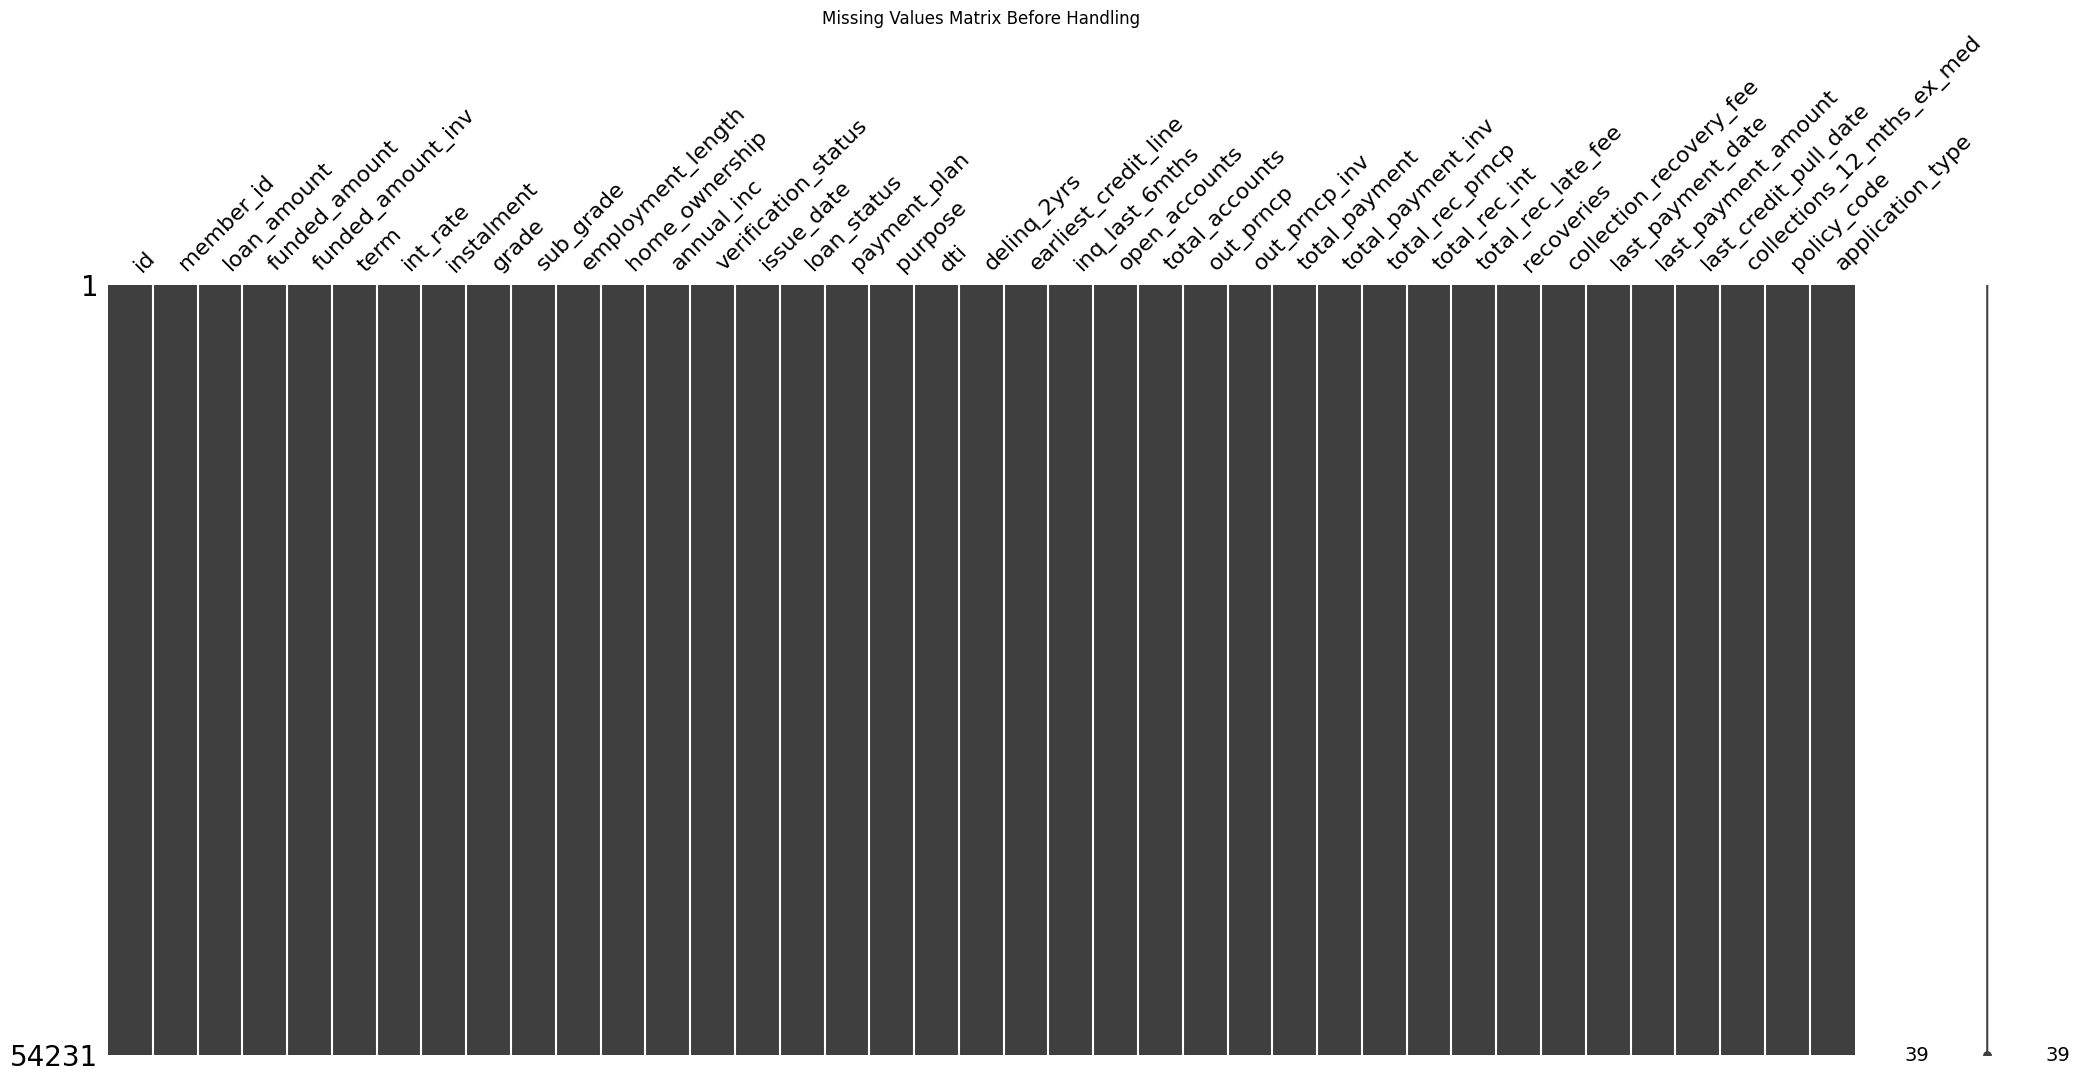

C:\Users\justi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\justi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


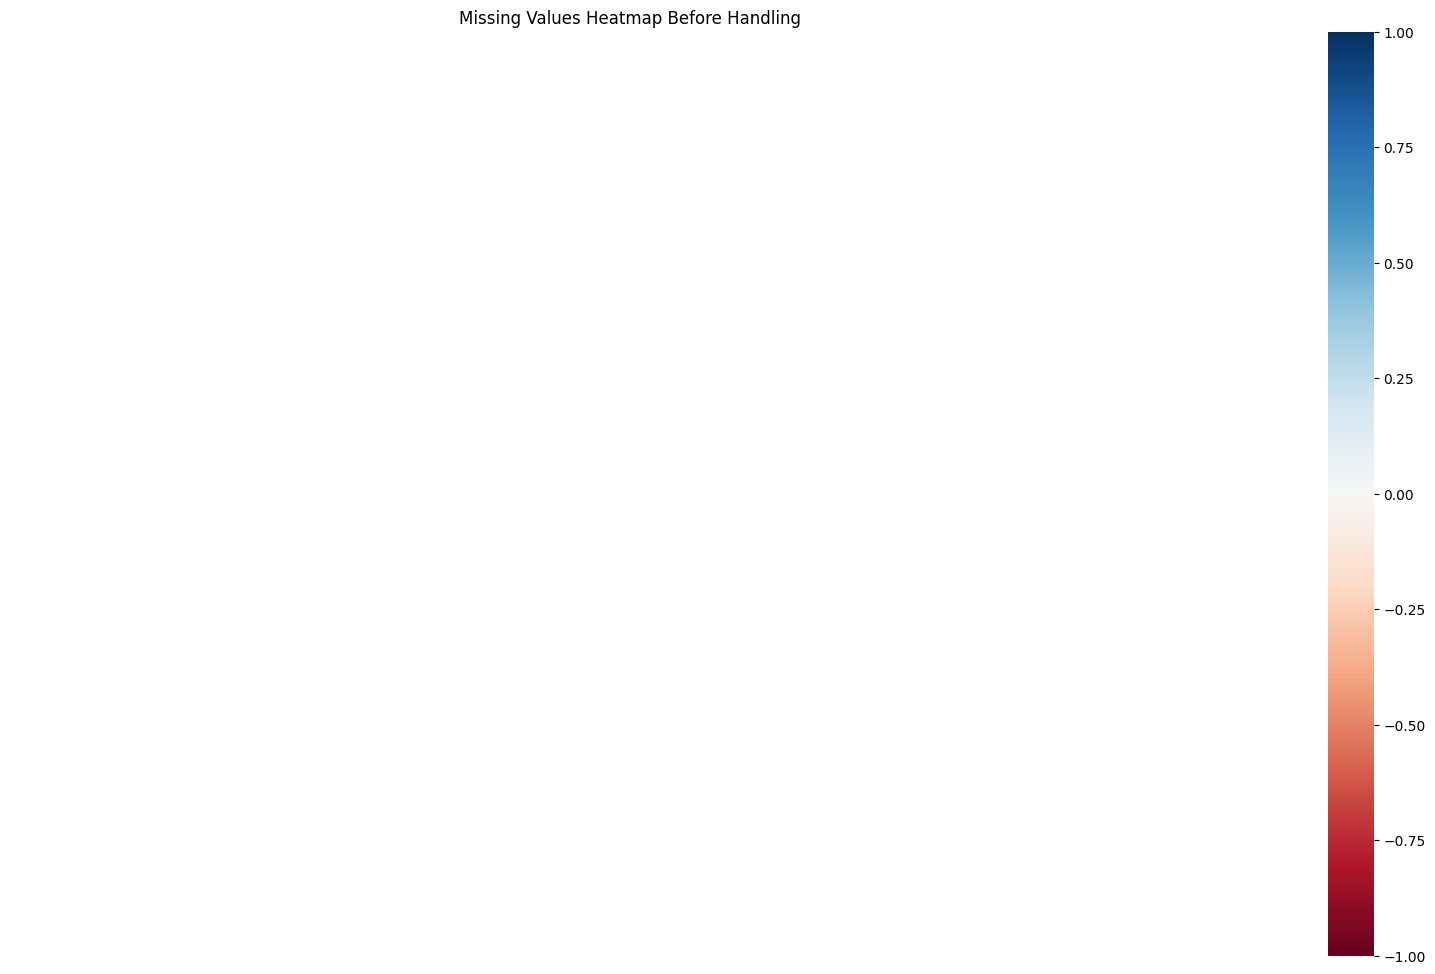

AttributeError: 'NoneType' object has no attribute 'shape'

In [7]:
from db_utils import Plotter
Nulls_skew = Plotter(loans_df)
nulls_skew_cleaned = Plotter(loans_df_cleaned)
Nulls_skew.show_matrix_before()
Nulls_skew.show_heatmap_before()
nulls_skew_cleaned.show_matrix_after()
nulls_skew_cleaned.show_matrix_after()



In [ ]:
from db_utils import MissingValuesVisual
mv_visuals = MissingValuesVisual(loans_df)

matrix_before = mv_visuals.show_matrix_before()

mv_visuals.show_heatmap_before()
pass

In [ ]:
# Visualize missing values using missingno
plt.title('Missing Values Matrix Before Handling')
plt.show()

msno.heatmap(loans_df)
plt.title('Missing Values Heatmap')
plt.show()

# Visualize missing values after handling
msno.matrix(loans_df)
plt.title('Missing Values Matrix')
plt.show()

# Additionally, you can create a heatmap to see the correlation of missingness between columns
msno.heatmap(loans_df)
plt.title('Missing Values Heatmap')
plt.show()